# Full installation

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels prophet sktime darts tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 57.8 MB/s eta 0:00:00


# Task starts here

In [ ]:
!git clone https://github.com/paulsamuel-w-e/kovai.co_task_round.git

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
raw_data = pd.read_csv("/content/kovai.co_task_round/kovai_dataset.csv")

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [5]:
raw_data.columns

Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')

In [7]:
columns = raw_data.columns
cleaned_columns = [col.replace(" ", "_").lower() for col in columns]

raw_data.columns = cleaned_columns
raw_data.set_index('date', inplace=True)
raw_data.sort_index(inplace=True)


print(raw_data.columns)
print(raw_data.head())

Index(['local_route', 'light_rail', 'peak_service', 'rapid_route', 'school',
       'other'],
      dtype='object')
            local_route  light_rail  peak_service  rapid_route  school  other
date                                                                         
01/01/2020         1325        2312             0         2586       0    1.0
01/01/2021         1256        2434             0         2608       0   13.0
01/01/2022         1028        1653             0         2245       0    9.0
01/01/2023         1364        2406             0         3178       0    4.0
01/01/2024         1481        2740             0         3308       0    6.0


In [9]:
raw_data.index = pd.to_datetime(raw_data.index, format='%d/%m/%Y')
raw_data.sort_index(inplace=True)

print(raw_data.head())

            local_route  light_rail  peak_service  rapid_route  school  other
date                                                                         
2019-07-01        15987        9962           407        21223    3715    NaN
2019-07-02        16895       10656           409        21715    3993    NaN
2019-07-03        16613       10658           427        22025    3638    NaN
2019-07-04        16604       10445           437        21868    3576    NaN
2019-07-05        16040       10532           400        20697    2856    NaN


In [10]:
raw_data.head(30)

,local_route,light_rail,peak_service,rapid_route,school,other
date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN
2019-07-06,5214,6141,0,6925,0,NaN
2019-07-07,4065,4332,0,5426,0,NaN
2019-07-08,13078,9442,422,18848,0,0.0
2019-07-09,13835,10550,455,19862,0,1.0


In [11]:
raw_data.isnull().sum()

,0
local_route,0
light_rail,0
peak_service,0
rapid_route,0
school,0
other,20


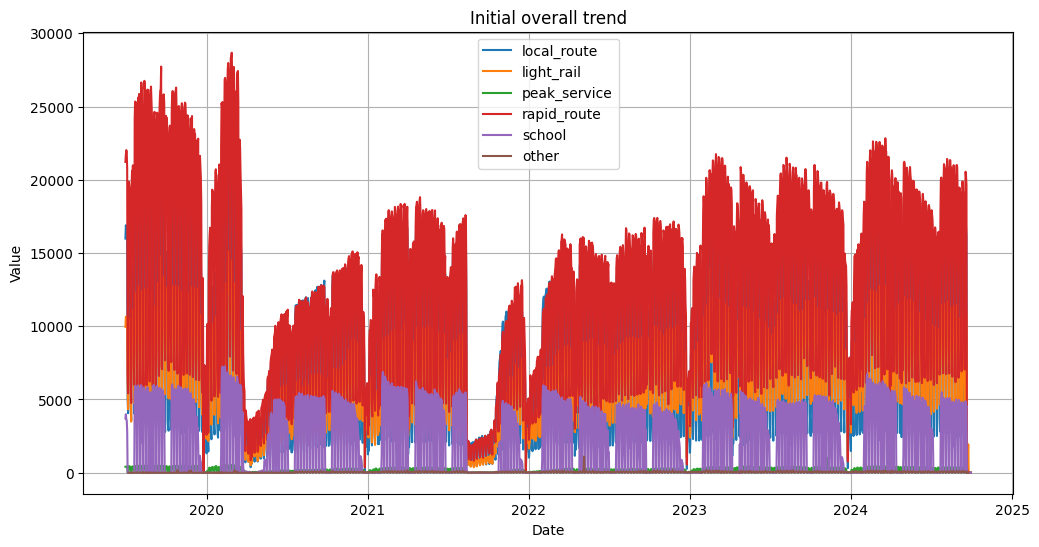

In [12]:
plt.figure(figsize=(12, 6))
for column in raw_data.columns:
    plt.plot(raw_data.index, raw_data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Initial overall trend')
plt.legend()
plt.grid(True)
plt.show()

lets zoom in a bit (maybe possibly around 2020 - 2021

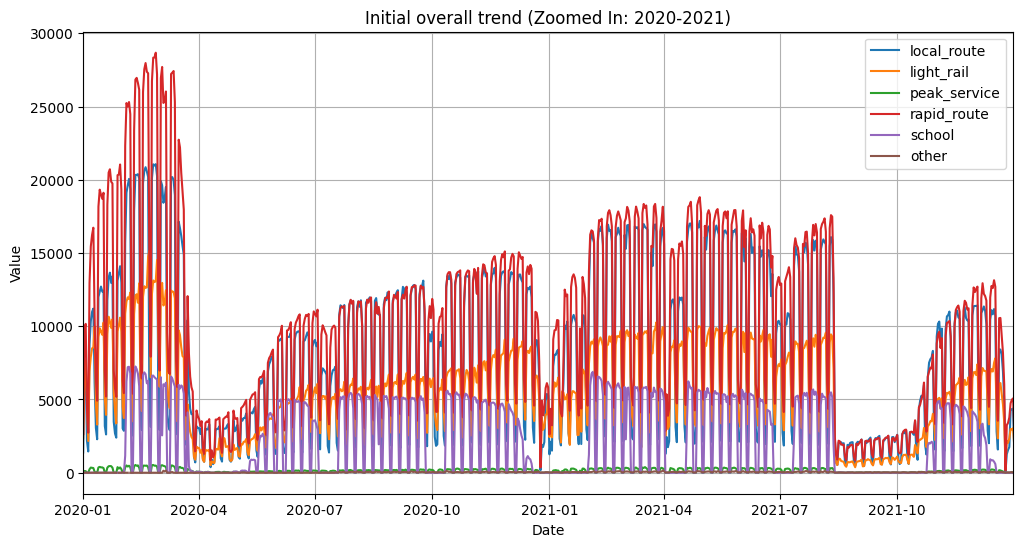

In [14]:
plt.figure(figsize=(12, 6))
for column in raw_data.columns:
    plt.plot(raw_data.index, raw_data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Initial overall trend (Zoomed In: 2020-2021)')
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'))
plt.show()

Before going furthrt lets make a copy of it.

In [15]:
copy_data = raw_data.copy()

In [16]:
copy_data.head()

,local_route,light_rail,peak_service,rapid_route,school,other
date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN


In [20]:
copy_data.describe()

,local_route,light_rail,peak_service,rapid_route,school,other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


May be i could scale it to have a better visibility....
Possibily log transform could help I guess

In [21]:
scale_data = copy_data.copy().transform(lambda x: np.log1p(x))
scale_data.describe()

,local_route,light_rail,peak_service,rapid_route,school,other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,8.867537,8.694457,3.688505,9.220386,4.300693,3.161606
std,1.003246,0.822521,2.585469,0.842987,4.157040,1.465394
min,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.021420,8.403912,0.000000,8.761550,0.000000,2.708050
50%,9.342946,8.923723,5.267858,9.480937,6.341994,3.713572
75%,9.649788,9.211265,5.751778,9.793994,8.500047,4.234107
max,9.955653,9.626086,6.937314,10.263920,8.889584,7.008505


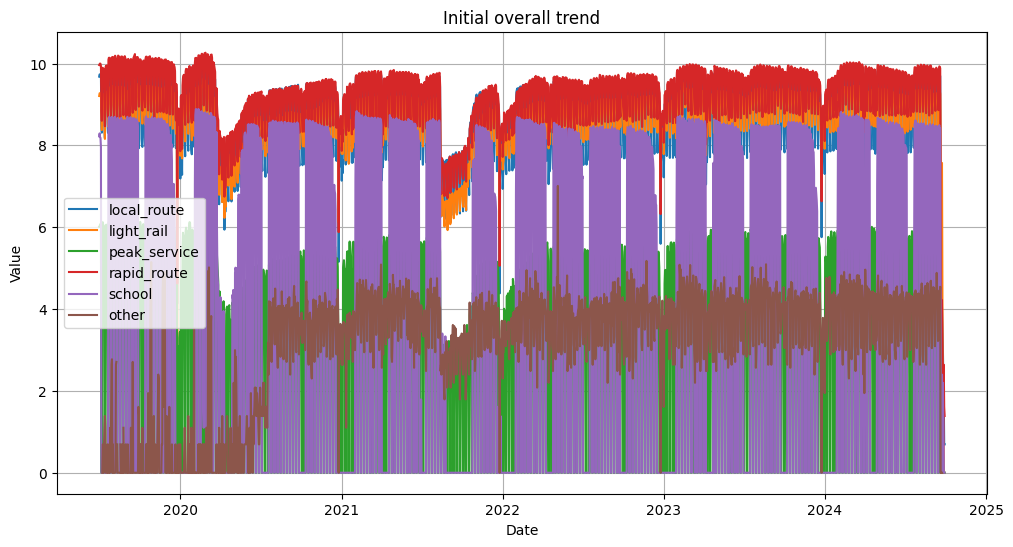

In [23]:
plt.figure(figsize=(12, 6))
for column in scale_data.columns:
    plt.plot(scale_data.index, scale_data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Initial overall trend')
plt.legend()
plt.grid(True)
plt.show()

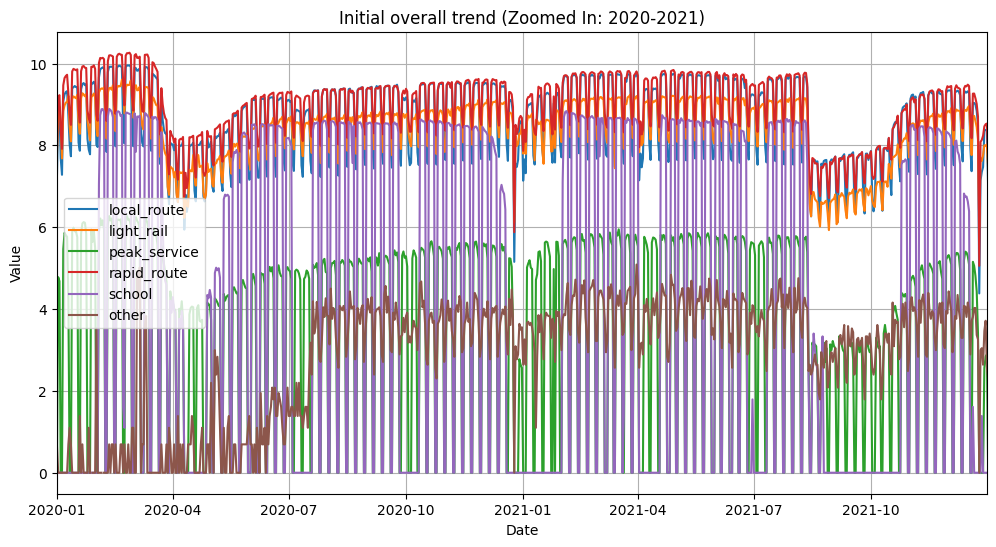

In [25]:
plt.figure(figsize=(12, 6))
for column in scale_data.columns:
    plt.plot(scale_data.index, scale_data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Initial overall trend (Zoomed In: 2020-2021)')
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'))
plt.show()

I don't know why there is a sudden spike in this...

And almost except the "others" everything overlaps very well!


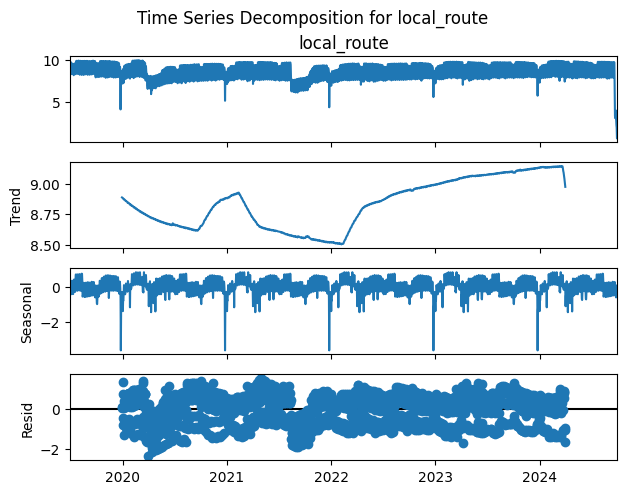

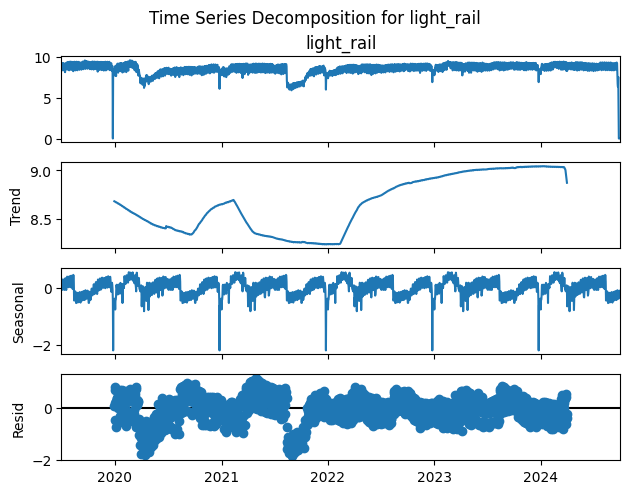

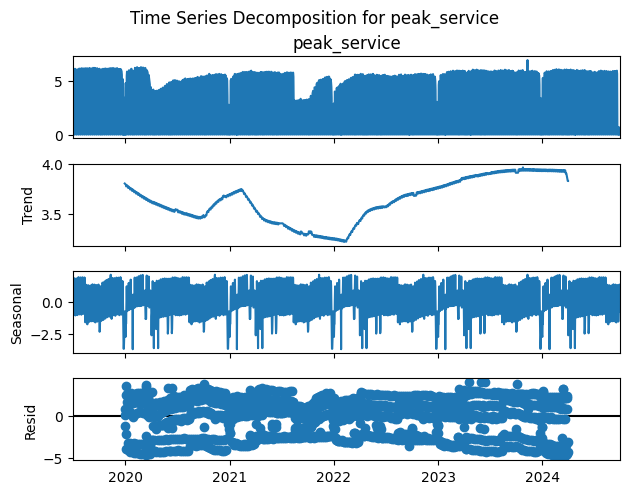

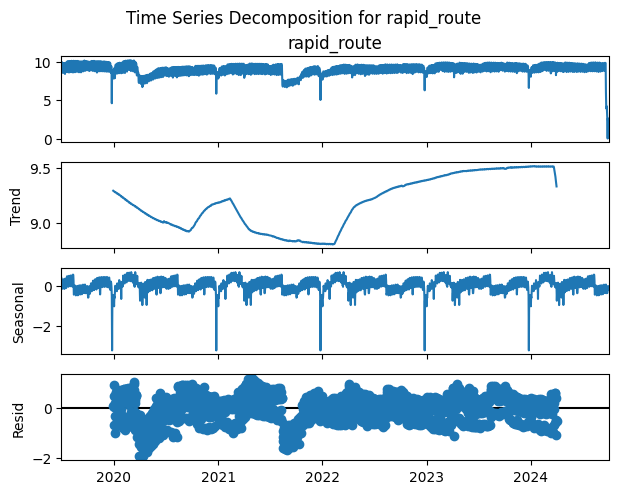

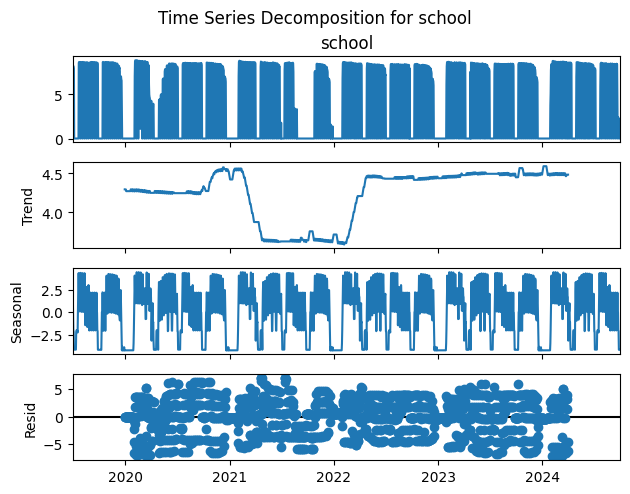

Skipping decomposition for 'other' due to missing values.


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose each column
for column in scale_data.columns:
    if scale_data[column].isnull().sum() > 0:
        print(f"Skipping decomposition for '{column}' due to missing values.")
        continue

    decomposition = seasonal_decompose(scale_data[column], model='additive', period=365)
    fig = decomposition.plot()
    fig.suptitle(f'Time Series Decomposition for {column}', y=1.02)
    plt.show()

So.... based on the plot >>> ITS A SEASONAL DATA

And the trend is almost similar except school ---> which shows a little variation

so its clearly have correlation... can we check the distribution?

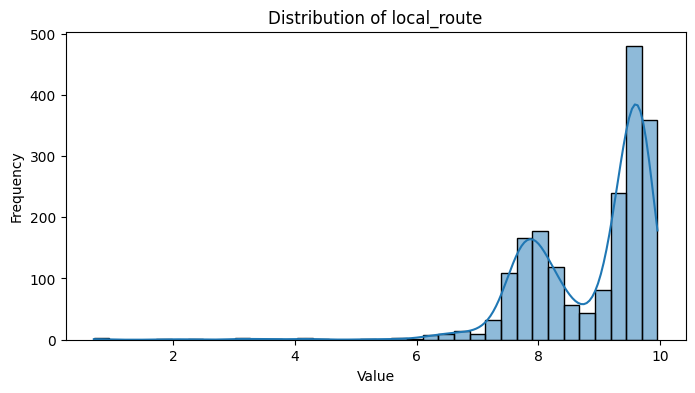

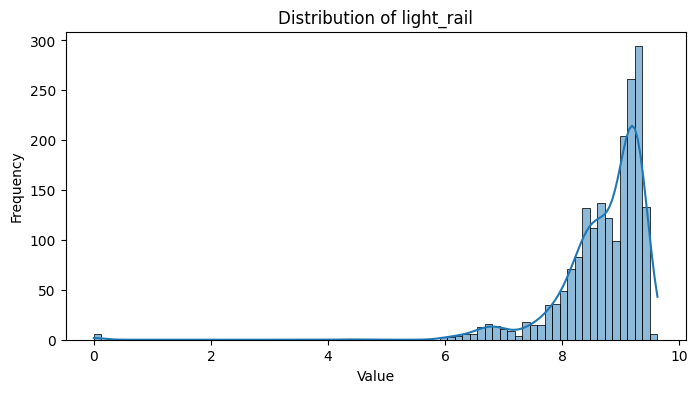

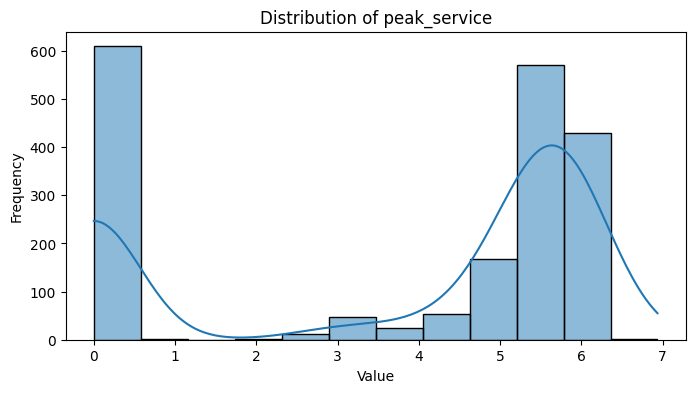

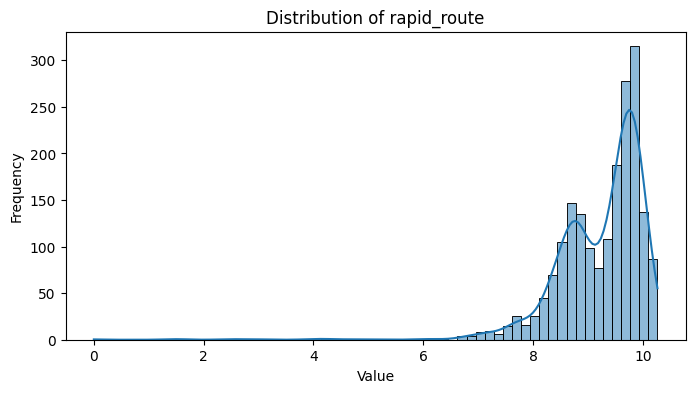

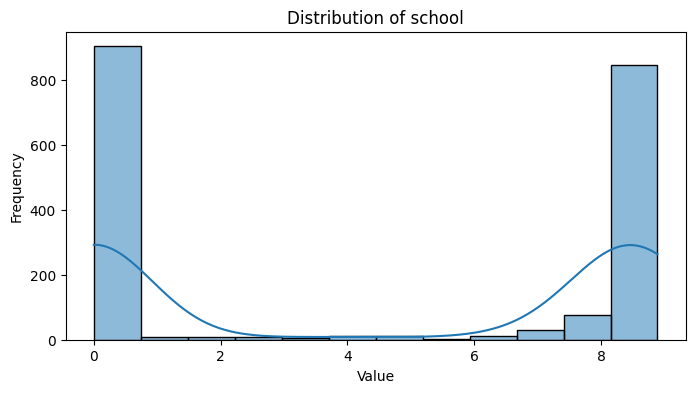

Skipping histogram for 'other' due to missing values.


In [29]:
for column in scale_data.columns:
    if scale_data[column].isnull().sum() > 0:
        print(f"Skipping histogram for '{column}' due to missing values.")
        continue

    plt.figure(figsize=(8, 4))
    sns.histplot(scale_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Ahhh.... it seams there are modalities... i suppose it is not an outlier... I guess... maybe sure

lets drop the missing values for now...!

In [30]:
scale_clean = scale_data.copy()

In [32]:
scale_clean.dropna(inplace=True)
scale_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2019-07-08 to 2024-09-23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   local_route   1898 non-null   float64
 1   light_rail    1898 non-null   float64
 2   peak_service  1898 non-null   float64
 3   rapid_route   1898 non-null   float64
 4   school        1898 non-null   float64
 5   other         1898 non-null   float64
dtypes: float64(6)
memory usage: 103.8 KB


perform data split

In [35]:
prophet_data = scale_clean[['local_route']].reset_index()
prophet_data.rename(columns={'date': 'ds', 'local_route': 'y'}, inplace=True)

print(prophet_data.head())

          ds         y
0 2019-07-08  9.478763
1 2019-07-09  9.535029
2 2019-07-10  9.536546
3 2019-07-11  9.455402
4 2019-07-12  9.442642


In [53]:
import cmdstanpy
cmdstanpy.install_cmdstan(overwrite=True)

CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.37.0
Download successful, file: /tmp/tmphn3de7ml
Extracting distribution
Unpacked download as cmdstan-2.37.0
Building version cmdstan-2.37.0, may take several minutes, depending on your system.
Installed cmdstan-2.37.0
Test model compilation


True

In [54]:
from prophet import Prophet
import logging
logger = logging.getLogger('prophet')
logger.setLevel(logging.DEBUG)

m = Prophet()
print(m.stan_backend)

DEBUG:prophet:Trying to load backend: CMDSTANPY
DEBUG:prophet:Unable to load backend CMDSTANPY (CmdStan installataion missing makefile, path /usr/local/lib/python3.12/dist-packages/prophet/stan_model/cmdstan-2.33.1 is invalid. You may wish to re-install cmdstan by running command "install_cmdstan --overwrite", or Python code "import cmdstanpy; cmdstanpy.install_cmdstan(overwrite=True)"), trying the next one


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [51]:
from prophet import Prophet


train_size = int(len(prophet_data) * 0.8)
train_data, test_data = prophet_data[0:train_size], prophet_data[train_size:]

model = Prophet(yearly_seasonality=20)
model.fit(train_data)

print("Prophet model fitted successfully.")

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [55]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.datasets import load_airline

y = scale_clean['local_route']

y_train, y_test = temporal_train_test_split(y, test_size=0.2)


fh = ForecastingHorizon(y_test.index, is_relative=False)


forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

print("sktime NaiveForecaster model fitted successfully.")

sktime NaiveForecaster model fitted successfully.


Mean Absolute Percentage Error (MAPE): 0.0813


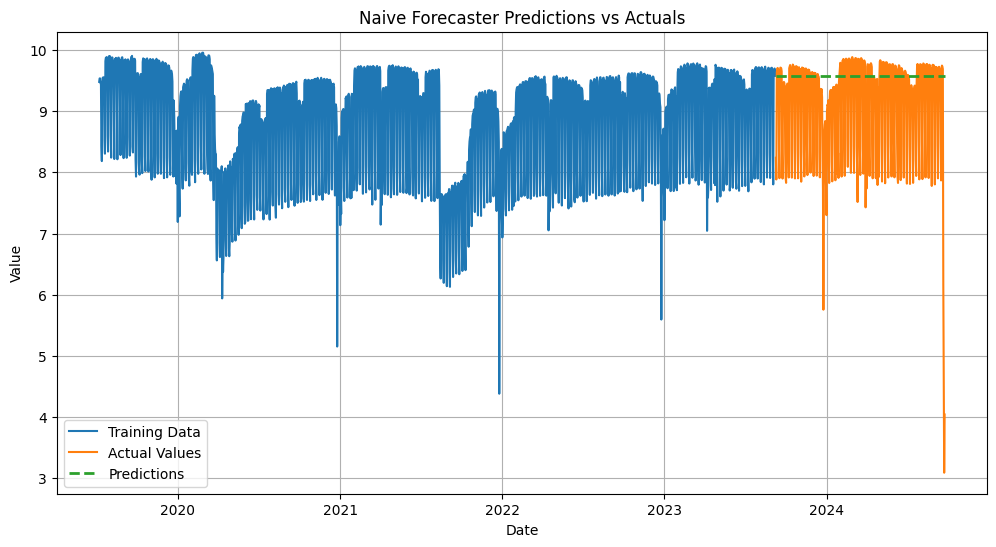

In [57]:
# Make predictions on the test set
y_pred = forecaster.predict(fh)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# You can also visualize the predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Values')
plt.plot(y_pred.index, y_pred, label='Predictions', linewidth=2, linestyle='--') # Modified line style and thickness
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Naive Forecaster Predictions vs Actuals')
plt.legend()
plt.grid(True)
plt.show()

I think I can go with darts

In [59]:
from darts import TimeSeries


darts_series = {}
for column in scale_clean.columns:
    darts_series[column] = TimeSeries.from_dataframe(scale_clean[[column]], fill_missing_dates=True)

print("Data converted to Darts TimeSeries objects.")

print(darts_series['local_route'].head())

Data converted to Darts TimeSeries objects.
<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)> Size: 40B
array([[[9.47876317]],

       [[9.53502917]],

       [[9.5365458 ]],

       [[9.45540196]],

       [[9.44264186]]])
Coordinates:
  * date       (date) datetime64[ns] 40B 2019-07-08 2019-07-09 ... 2019-07-12
  * component  (component) object 8B 'local_route'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None


Mean Absolute Percentage Error (MAPE): 7.1689


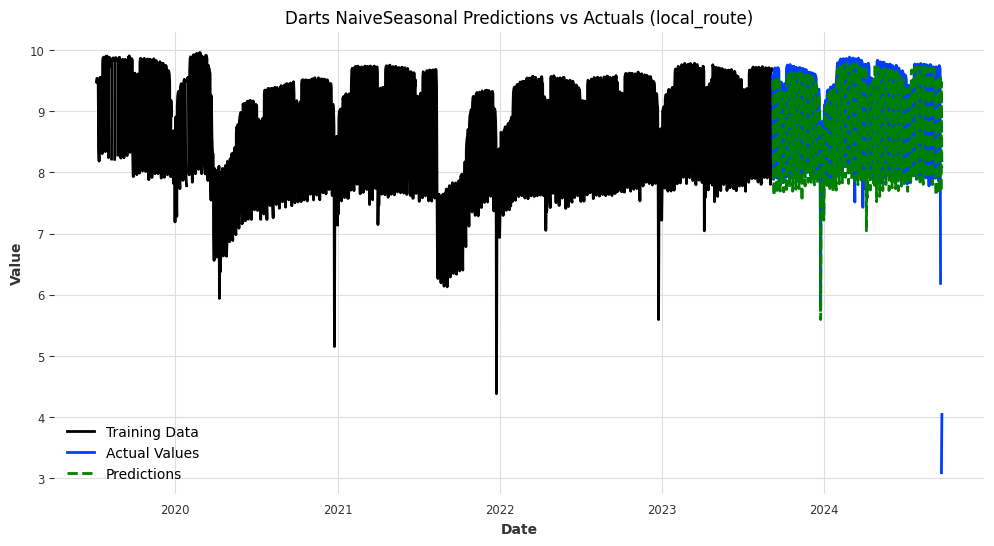

In [61]:
from darts.models import NaiveSeasonal
from darts.metrics import mape


series = darts_series['local_route']


train_series, test_series = series.split_before(0.8)

forecast_horizon = len(test_series)


model = NaiveSeasonal(K=365)
model.fit(train_series)


predictions = model.predict(n=forecast_horizon)


mae_error = mape(test_series, predictions)

print(f"Mean Absolute Percentage Error (MAPE): {mae_error:.4f}")


plt.figure(figsize=(12, 6))
train_series.plot(label='Training Data')
test_series.plot(label='Actual Values')
predictions.plot(label='Predictions', linewidth=2, linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Darts NaiveSeasonal Predictions vs Actuals (local_route)')
plt.legend()
plt.grid(True)
plt.show()


Processing column: local_route
Mean Absolute Error (MAE) for NaiveSeasonal on 'local_route': 0.5961


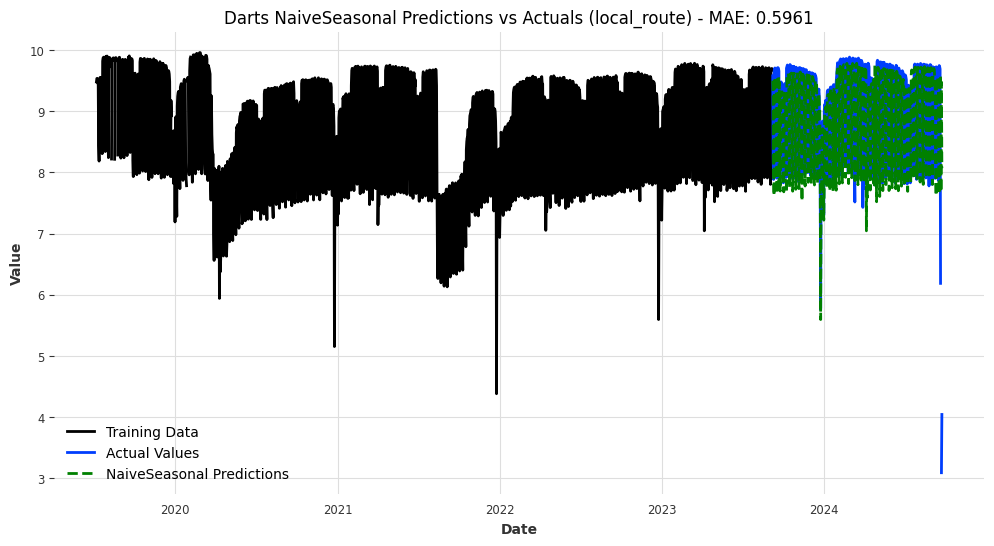


Processing column: light_rail
Mean Absolute Error (MAE) for NaiveSeasonal on 'light_rail': 0.3020


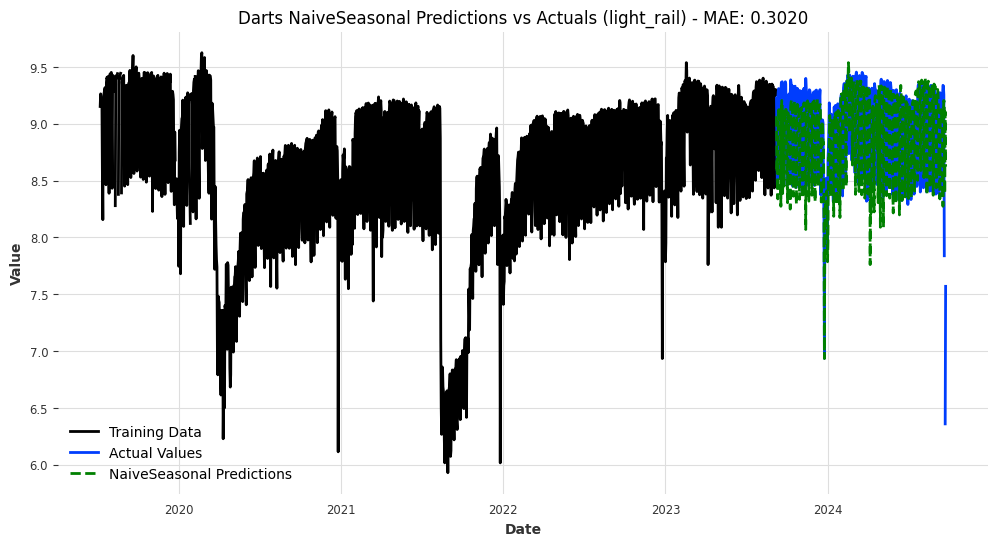


Processing column: peak_service
Mean Absolute Error (MAE) for NaiveSeasonal on 'peak_service': 1.8058


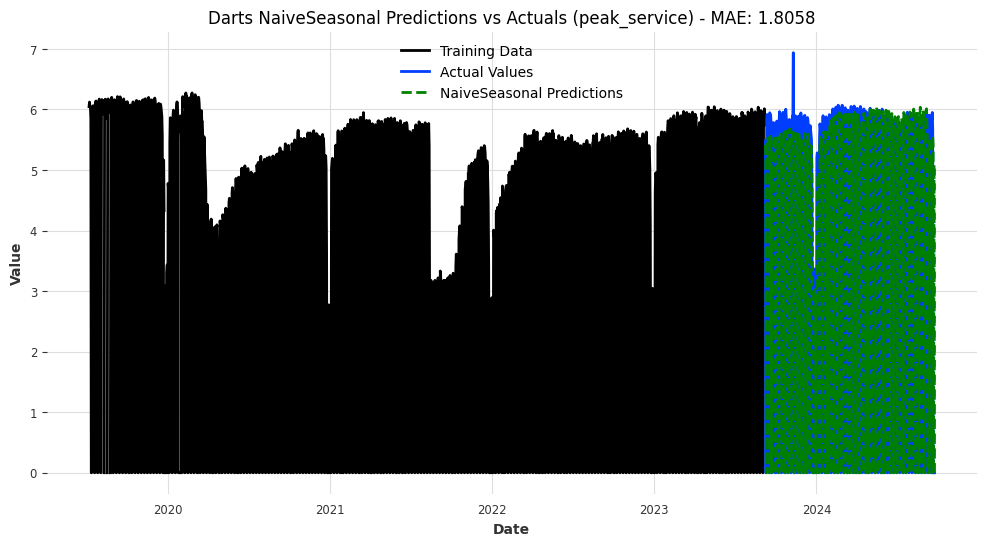


Processing column: rapid_route
Mean Absolute Error (MAE) for NaiveSeasonal on 'rapid_route': 0.3874


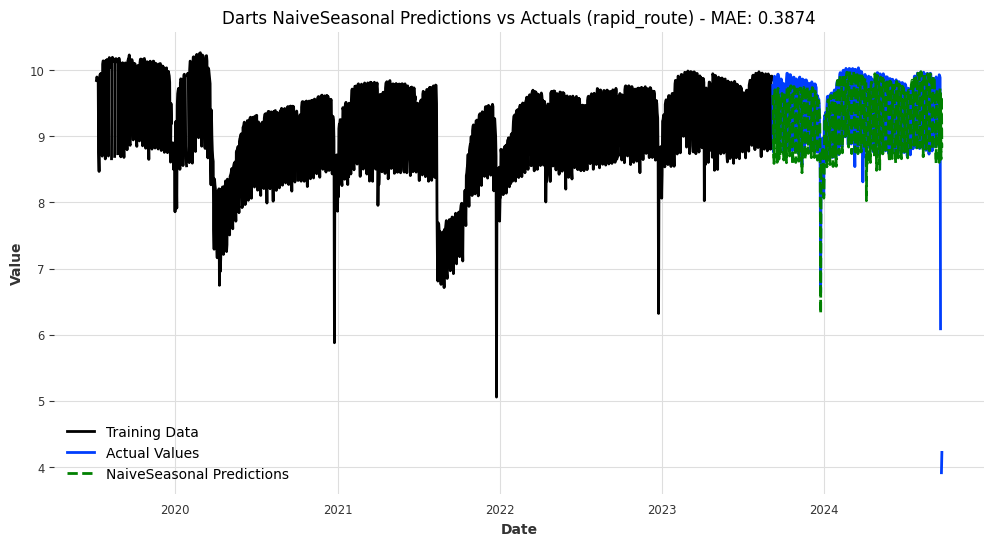


Processing column: school
Mean Absolute Error (MAE) for NaiveSeasonal on 'school': 2.3285


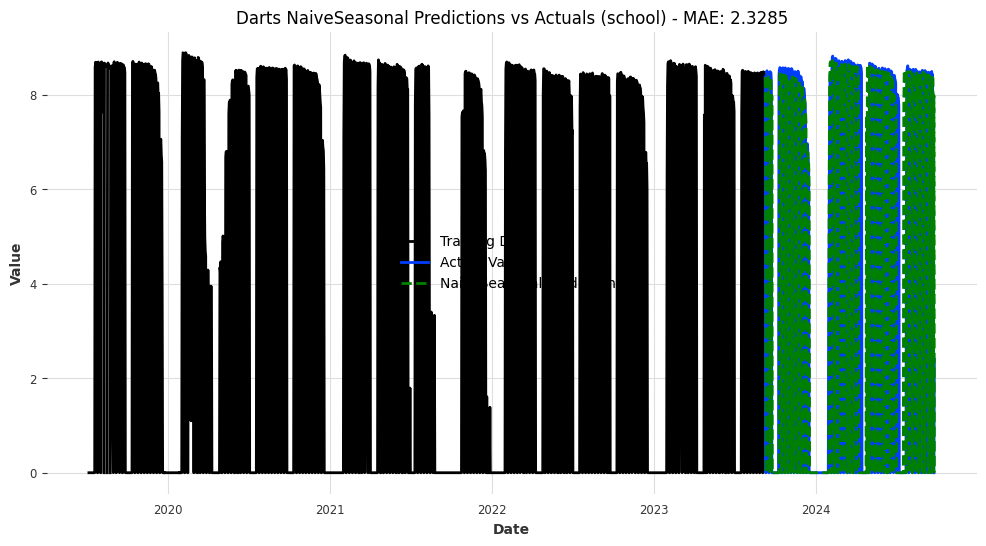


Processing column: other
Mean Absolute Error (MAE) for NaiveSeasonal on 'other': 0.5799


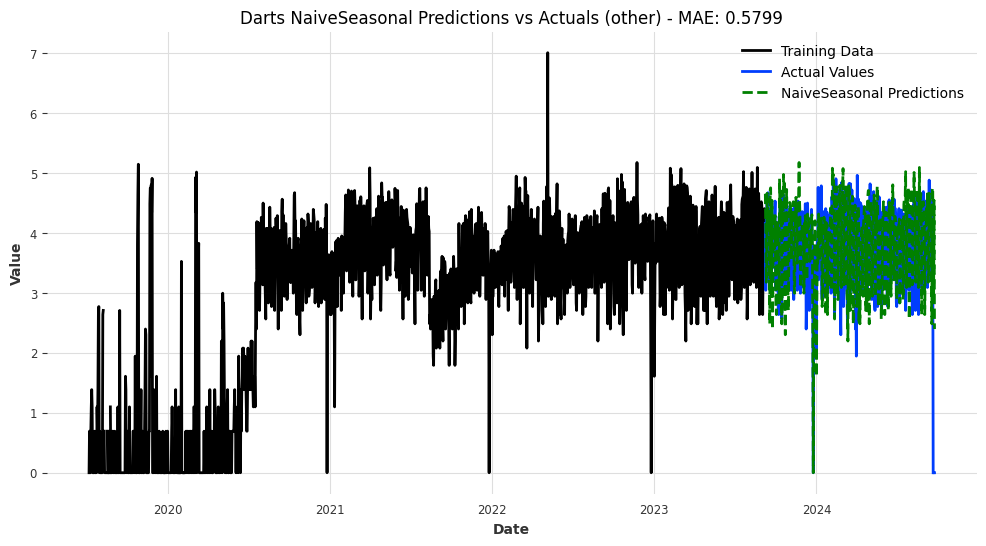


Fitted NaiveSeasonal models stored in 'fitted_naive_seasonal_models' dictionary.
NaiveSeasonal predictions stored in 'naive_seasonal_predictions' dictionary.
NaiveSeasonal MAE scores stored in 'naive_seasonal_scores' dictionary.


In [72]:
from darts.models import NaiveSeasonal
from darts.metrics import mape, mae # Import mae
import matplotlib.pyplot as plt

# Dictionary to store fitted models
fitted_naive_seasonal_models = {}
naive_seasonal_predictions = {}
naive_seasonal_scores = {} # Change dictionary name to be more general for different metrics

# Loop through each TimeSeries in darts_series
for column, series in darts_series.items():
    print(f"\nProcessing column: {column}")

    # Split data into training and testing sets
    train_series, test_series = series.split_before(0.8) # Split before 80% of the data

    # Define the forecasting horizon (length of the test set)
    forecast_horizon = len(test_series)

    # Initialize and fit a NaiveSeasonal model (assuming yearly seasonality)
    model = NaiveSeasonal(K=365) # Assuming daily data with yearly seasonality
    model.fit(train_series)

    # Store the fitted model
    fitted_naive_seasonal_models[column] = model

    # Make predictions on the test set
    predictions = model.predict(n=forecast_horizon)

    # Store the predictions
    naive_seasonal_predictions[column] = predictions

    # Evaluate the model using Mean Absolute Error (MAE) instead of MAPE
    mae_error = mae(test_series, predictions) # Use mae

    # Store the MAE score
    naive_seasonal_scores[column] = mae_error # Store MAE score

    print(f"Mean Absolute Error (MAE) for NaiveSeasonal on '{column}': {mae_error:.4f}") # Print MAE

    # Visualize the predictions vs actuals
    plt.figure(figsize=(12, 6))
    train_series.plot(label='Training Data')
    test_series.plot(label='Actual Values')
    predictions.plot(label='NaiveSeasonal Predictions', linewidth=2, linestyle='--', color='green')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Darts NaiveSeasonal Predictions vs Actuals ({column}) - MAE: {mae_error:.4f}') # Add MAE to title
    plt.legend()
    plt.grid(True)
    plt.show()

print("\nFitted NaiveSeasonal models stored in 'fitted_naive_seasonal_models' dictionary.")
print("NaiveSeasonal predictions stored in 'naive_seasonal_predictions' dictionary.")
print("NaiveSeasonal MAE scores stored in 'naive_seasonal_scores' dictionary.") # Update print statement

In [74]:
print(fitted_naive_seasonal_models)

{'local_route': NaiveSeasonal(K=365), 'light_rail': NaiveSeasonal(K=365), 'peak_service': NaiveSeasonal(K=365), 'rapid_route': NaiveSeasonal(K=365), 'school': NaiveSeasonal(K=365), 'other': NaiveSeasonal(K=365)}



Processing column: local_route
Mean Absolute Error (MAE) for NaiveSeasonal on 'local_route': 0.5961

Processing column: light_rail
Mean Absolute Error (MAE) for NaiveSeasonal on 'light_rail': 0.3020

Processing column: peak_service
Mean Absolute Error (MAE) for NaiveSeasonal on 'peak_service': 1.8058

Processing column: rapid_route
Mean Absolute Error (MAE) for NaiveSeasonal on 'rapid_route': 0.3874

Processing column: school
Mean Absolute Error (MAE) for NaiveSeasonal on 'school': 2.3285

Processing column: other
Mean Absolute Error (MAE) for NaiveSeasonal on 'other': 0.5799



In [76]:
# Predict the next 7 days for each column using the fitted models
future_predictions_naive_seasonal = {}

for column, model in fitted_naive_seasonal_models.items():
    # Use the entire series for prediction
    series = darts_series[column]

    # Predict the next 7 time steps
    forecast = model.predict(n=7)

    future_predictions_naive_seasonal[column] = forecast

    print(f"\nNaiveSeasonal forecast for the next 7 days for '{column}':")
    # Convert the Darts TimeSeries forecast to a pandas Series
    # Access the data array and use the forecast's time index
    forecast_series = pd.Series(forecast.values().flatten(), index=forecast.time_index)
    print(forecast_series) # Print the forecast as a pandas Series

# You can access the predictions for each column from the 'future_predictions_naive_seasonal' dictionary
# For example, to get the forecast for 'local_route':
# local_route_forecast = future_predictions_naive_seasonal['local_route']


NaiveSeasonal forecast for the next 7 days for 'local_route':
date
2023-09-08    9.498822
2023-09-09    9.334768
2023-09-10    8.089176
2023-09-11    7.621195
2023-09-12    9.475547
2023-09-13    9.533872
2023-09-14    9.557399
Freq: D, dtype: float64

NaiveSeasonal forecast for the next 7 days for 'light_rail':
date
2023-09-08    9.067047
2023-09-09    8.575273
2023-09-10    8.689969
2023-09-11    8.339501
2023-09-12    9.053219
2023-09-13    9.123147
2023-09-14    9.125218
Freq: D, dtype: float64

NaiveSeasonal forecast for the next 7 days for 'peak_service':
date
2023-09-08    5.416100
2023-09-09    5.209486
2023-09-10    0.000000
2023-09-11    0.000000
2023-09-12    5.375278
2023-09-13    5.402677
2023-09-14    5.533389
Freq: D, dtype: float64

NaiveSeasonal forecast for the next 7 days for 'rapid_route':
date
2023-09-08    9.624435
2023-09-09    9.572202
2023-09-10    8.863050
2023-09-11    8.589514
2023-09-12    9.619200
2023-09-13    9.703145
2023-09-14    9.685705
Freq: D, dty

In [80]:
# Fill missing values in scale_data using interpolation and then backward fill
scale_data_filled = scale_data.copy()
scale_data_filled['other'].interpolate(inplace=True)
scale_data_filled['other'].fillna(method='bfill', inplace=True) # Fill remaining NaNs using backward fill

# Verify that missing values have been filled
print("Missing values after interpolation and backward fill:")
print(scale_data_filled.isnull().sum())

# Display the head of the filled data
print("\nHead of scale_data_filled:")
print(scale_data_filled.head())

Missing values after interpolation and backward fill:
local_route     0
light_rail      0
peak_service    0
rapid_route     0
school          0
other           0
dtype: int64

Head of scale_data_filled:
            local_route  light_rail  peak_service  rapid_route    school  \
date                                                                       
2019-07-01     9.679594    9.206634      6.011267     9.962888  8.220403   
2019-07-02     9.734832    9.273972      6.016157     9.985805  8.292549   
2019-07-03     9.718001    9.274160      6.059123     9.999979  8.199464   
2019-07-04     9.717459    9.253974      6.082219     9.992825  8.182280   
2019-07-05     9.682903    9.262268      5.993961     9.937792  7.957527   

            other  
date               
2019-07-01    0.0  
2019-07-02    0.0  
2019-07-03    0.0  
2019-07-04    0.0  
2019-07-05    0.0  


/tmp/ipython-input-4232846582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scale_data_filled['other'].interpolate(inplace=True)
/tmp/ipython-input-4232846582.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [81]:
scale_data_filled.tail()

,local_route,light_rail,peak_service,rapid_route,school,other
date,,,,,,
2024-09-25,3.091042,0.0,0.693147,2.397895,2.197225,0.0
2024-09-26,2.302585,0.0,0.000000,0.000000,1.098612,0.0
2024-09-27,1.945910,0.0,0.000000,2.639057,0.000000,0.0
2024-09-28,0.693147,0.0,0.000000,1.609438,0.000000,0.0
2024-09-29,0.693147,0.0,0.000000,1.386294,0.000000,0.0


In [82]:
from darts import TimeSeries
from darts.models import NaiveSeasonal
import pandas as pd

# Convert the filled data to Darts TimeSeries objects
darts_series_filled = {}
for column in scale_data_filled.columns:
    # Use fill_missing_dates=True just in case, although data should be filled
    darts_series_filled[column] = TimeSeries.from_dataframe(scale_data_filled[[column]], fill_missing_dates=True)

print("Filled data converted to Darts TimeSeries objects.")


# Dictionary to store newly fitted models on filled data
fitted_naive_seasonal_models_filled = {}
future_predictions_naive_seasonal_filled = {}

# Loop through each TimeSeries in the filled darts_series
for column, series in darts_series_filled.items():
    print(f"\nTraining NaiveSeasonal model on filled data for column: {column}")

    # Initialize and fit a NaiveSeasonal model on the entire series
    model = NaiveSeasonal(K=365) # Assuming daily data with yearly seasonality
    model.fit(series) # Fit on the entire series

    # Store the fitted model
    fitted_naive_seasonal_models_filled[column] = model

    # Predict the next 7 time steps using the model fitted on the entire series
    forecast = model.predict(n=7)

    future_predictions_naive_seasonal_filled[column] = forecast

    print(f"NaiveSeasonal forecast for the next 7 days for '{column}' using filled data:")
    # Convert the Darts TimeSeries forecast to a pandas Series
    forecast_series = pd.Series(forecast.values().flatten(), index=forecast.time_index)
    print(forecast_series) # Print the forecast as a pandas Series

print("\nFitted NaiveSeasonal models on filled data stored in 'fitted_naive_seasonal_models_filled' dictionary.")
print("NaiveSeasonal predictions for the next 7 days stored in 'future_predictions_naive_seasonal_filled' dictionary.")

Filled data converted to Darts TimeSeries objects.

Training NaiveSeasonal model on filled data for column: local_route
NaiveSeasonal forecast for the next 7 days for 'local_route' using filled data:
date
2024-09-30    7.903227
2024-10-01    7.828835
2024-10-02    9.411320
2024-10-03    9.333177
2024-10-04    9.452031
2024-10-05    9.418898
2024-10-06    8.313362
Freq: D, dtype: float64

Training NaiveSeasonal model on filled data for column: light_rail
NaiveSeasonal forecast for the next 7 days for 'light_rail' using filled data:
date
2024-09-30    8.635509
2024-10-01    8.454892
2024-10-02    9.230633
2024-10-03    9.119759
2024-10-04    9.235813
2024-10-05    9.263123
2024-10-06    8.829226
Freq: D, dtype: float64

Training NaiveSeasonal model on filled data for column: peak_service
NaiveSeasonal forecast for the next 7 days for 'peak_service' using filled data:
date
2024-09-30    0.000000
2024-10-01    0.000000
2024-10-02    5.730100
2024-10-03    5.808142
2024-10-04    5.746203
20

In [83]:
forecast_series_dict = {}


for column, forecast_ts in future_predictions_naive_seasonal_filled.items():
    forecast_series_dict[column] = pd.Series(forecast_ts.values().flatten(), index=forecast_ts.time_index)

all_column_forecasts_df = pd.concat(forecast_series_dict, axis=1)

print("Concatenated 7-day forecasts for all columns:")
print(all_column_forecasts_df)

Concatenated 7-day forecasts for all columns:
            local_route  light_rail  peak_service  rapid_route  school  \
date                                                                     
2024-09-30     7.903227    8.635509      0.000000     8.909235     0.0   
2024-10-01     7.828835    8.454892      0.000000     8.771990     0.0   
2024-10-02     9.411320    9.230633      5.730100     9.797071     0.0   
2024-10-03     9.333177    9.119759      5.808142     9.681905     0.0   
2024-10-04     9.452031    9.235813      5.746203     9.786392     0.0   
2024-10-05     9.418898    9.263123      5.564520     9.762327     0.0   
2024-10-06     8.313362    8.829226      0.000000     9.074062     0.0   

               other  
date                  
2024-09-30  3.091042  
2024-10-01  3.044522  
2024-10-02  4.158883  
2024-10-03  4.174387  
2024-10-04  4.007333  
2024-10-05  4.127134  
2024-10-06  2.708050  


In [85]:

csv_file_path = '7_day_forecasts.csv'

all_column_forecasts_df.to_csv(csv_file_path)

print(f"7-day forecasts saved to '{csv_file_path}'")

7-day forecasts saved to '7_day_forecasts.csv'
